In [1]:
import os
import keras
import numpy as np
training_folder_name = 'data/shapes/training'
classes = os.listdir(training_folder_name)
classes

Using TensorFlow backend.


['circle', 'square', 'triangle']

In [6]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

img_size = (128,128)
batch_size = 30

train_generator = datagen.flow_from_directory(training_folder_name,
                                              target_size=img_size,
                                              batch_size=batch_size,class_mode="categorical",subset="training" )

validation_generator = datagen.flow_from_directory(training_folder_name,
                                              target_size=img_size,
                                              batch_size=batch_size,class_mode="categorical",subset="validation" )

Found 840 images belonging to 3 classes.
Found 360 images belonging to 3 classes.


In [7]:
print("Image Shape :",train_generator.image_shape)
print("Number of Classses :",train_generator.num_classes)
print("Train Sample :", train_generator.samples)
print("Validation Sample :", validation_generator.samples)

Image Shape : (128, 128, 3)
Number of Classses : 3
Train Sample : 840
Validation Sample : 360


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense
from keras.optimizers import Adam

filter_size = (6,6) # also called as kernal size
# 32 is number of unit in first convolution layer
input_shape = train_generator.image_shape # (128 x 128 x 3)
no_classes = train_generator.num_classes # which is 3(circle, square, triangle)
activation_1, activation_2 = "relu", "softmax" #Using Rectified Linear Unit and Softmax for this model


# Model Creatation
model = Sequential()

model.add(Conv2D(32, (6,6), input_shape=input_shape, activation=activation_1 ))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (6,6), activation= activation_1))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(no_classes, activation=activation_2))

opt = Adam(lr=0.001)

model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
          
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 123, 123, 32)      3488      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 32)        36896     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 75267     
Total params: 115,651
Trainable params: 115,651
Non-trainable params: 0
________________________________________________

In [9]:
# Model Training

num_epochs = 8
history = model.fit_generator(train_generator, 
                              steps_per_epoch= train_generator.samples // batch_size, 
                              validation_data = validation_generator,
                              validation_steps = validation_generator.samples// batch_size, 
                              epochs = num_epochs)

Epoch 1/8
28/28 [==============================] - 5s 167ms/step - loss: 0.8389 - accuracy: 0.6643 - val_loss: 0.4016 - val_accuracy: 0.8194
Epoch 2/8
28/28 [==============================] - 4s 156ms/step - loss: 0.2693 - accuracy: 0.9024 - val_loss: 0.0981 - val_accuracy: 0.9611
Epoch 3/8
28/28 [==============================] - 4s 156ms/step - loss: 0.0849 - accuracy: 0.9893 - val_loss: 0.0301 - val_accuracy: 1.0000
Epoch 4/8
28/28 [==============================] - 4s 157ms/step - loss: 0.0262 - accuracy: 0.9988 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 5/8
28/28 [==============================] - 4s 157ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 6/8
28/28 [==============================] - 4s 157ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 7/8
28/28 [==============================] - 4s 157ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 8/8
28/

In [10]:
from keras.models import load_model

modelFileName = 'shape-classifier.h5'

model.save(modelFileName)

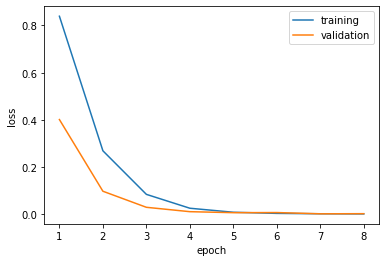

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

Generating predictions from validation data...


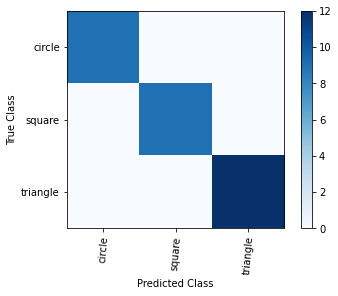

In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

# Use the moedl to predict the class
class_probabilities = model.predict(x_test)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=85)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [2]:
def predict(image_path):
    open_image = Image.open(image_path)
    resized = open_image.resize((128,128))
    resized_arr = np.array(resized)
    own_test_image = np.array([resized_arr])
    pred = model.predict(own_test_image)
    class_name = classes[np.argmax(pred)]
    print(10*" ",class_name)
    plt.imshow(resized_arr)
    plt.show()